In [1]:
import tensorflow as tf
import numpy as np

(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

(60000, 28, 28) (60000,)


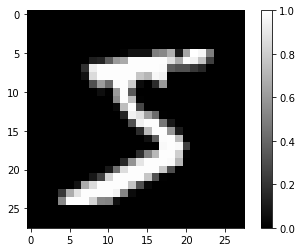

5


In [2]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

In [4]:
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0499
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0165
Epoch 3/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0115
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0095
Epoch 5/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0083
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0075
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0070
Epoch 8/10
235/235 [==============================] - 3s 15ms/step - loss: 0.0066
Epoch 9/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0063
Epoch 10/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0060


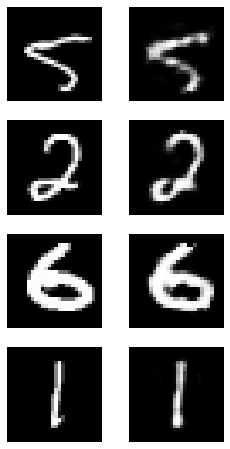

313/313 [==============================] - 1s 4ms/step - loss: 0.0057


0.005716375540941954

In [6]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    
plt.show()
model.evaluate(test_X, test_X)

In [8]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                200768    
_________________________________________________________________
dense_4 (Dense)              (None, 3136)              203840    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)       

In [10]:
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 18s 75ms/step - loss: 0.0714
Epoch 2/20
235/235 [==============================] - 18s 76ms/step - loss: 0.0274
Epoch 3/20
235/235 [==============================] - 17s 72ms/step - loss: 0.0198
Epoch 4/20
235/235 [==============================] - 17s 71ms/step - loss: 0.0178
Epoch 5/20
235/235 [==============================] - 16s 70ms/step - loss: 0.0168
Epoch 6/20
235/235 [==============================] - 16s 70ms/step - loss: 0.0163
Epoch 7/20
235/235 [==============================] - 16s 70ms/step - loss: 0.0159
Epoch 8/20
235/235 [==============================] - 18s 76ms/step - loss: 0.0156
Epoch 9/20
235/235 [==============================] - 18s 75ms/step - loss: 0.0153
Epoch 10/20
235/235 [==============================] - 17s 73ms/step - loss: 0.0151
Epoch 11/20
235/235 [==============================] - 18s 78ms/step - loss: 0.0150
Epoch 12/20
235/235 [==============================] - 18s 75ms/step - loss: 0.0148
E

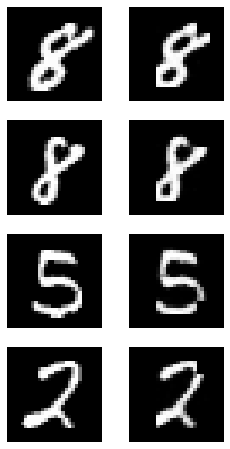

313/313 [==============================] - 1s 5ms/step - loss: 0.0139


0.013869049027562141

In [11]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    
plt.show()
model.evaluate(test_X, test_X)

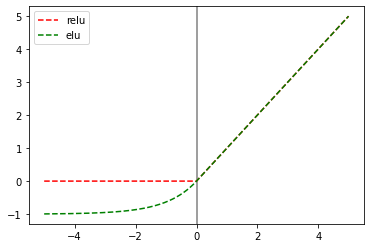

In [12]:
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g--', label='elu')
plt.legend()
plt.show()

In [15]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=2, strides=(2,2), activation='elu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='elu'),
    tf.keras.layers.Dense(7*7*64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7,7,64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])
model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 20s 83ms/step - loss: 0.0545
Epoch 2/20
235/235 [==============================] - 18s 78ms/step - loss: 0.0171
Epoch 3/20
235/235 [==============================] - 20s 86ms/step - loss: 0.0121
Epoch 4/20
235/235 [==============================] - 19s 80ms/step - loss: 0.0107
Epoch 5/20
235/235 [==============================] - 19s 80ms/step - loss: 0.0100
Epoch 6/20
235/235 [==============================] - 19s 80ms/step - loss: 0.0095
Epoch 7/20
235/235 [==============================] - 18s 77ms/step - loss: 0.0091
Epoch 8/20
235/235 [==============================] - 20s 84ms/step - loss: 0.0088
Epoch 9/20
235/235 [==============================] - 19s 80ms/step - loss: 0.0086
Epoch 10/20
235/235 [==============================] - 19s 79ms/step - loss: 0.0084
Epoch 11/20
235/235 [==============================] - 19s 81ms/step - loss: 0.0082
Epoch 12/20
235/235 [==============================] - 18s 79ms/step - loss: 0.0080
E

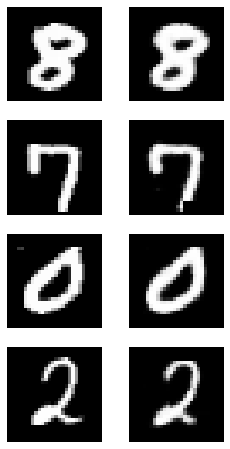

313/313 [==============================] - 1s 4ms/step - loss: 0.0064


0.006356960628181696

In [16]:
import random

plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    
plt.show()
model.evaluate(test_X, test_X)